<a href="https://colab.research.google.com/github/steve-burman/machine-learning-intro/blob/master/TensorFlow_SXB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Demo
Steve Burman

303-249-1177

steve.burman@jeppesen.com

Check environment by printing welcome message:

In [0]:
message = "Welcome to Steve's TensorFlow Demo space"
print( message )

# Linear Regression
best fit using objective function:  y = m * x + b

In [0]:
import  matplotlib.pyplot  as plt

%tensorflow_version  2.x
import  tensorflow  as  tf
print( tf.__version__ )

from  tensorflow.keras  import Model

%matplotlib inline

def  createSimulatedData( m=0.1, b=0.3, n=100, stddev=0.1 ):
  x = tf.random.uniform( shape=( n, ) )
  noise = tf.random.normal( shape=( len(x), ), stddev=stddev )
  y = m * x + b + noise
  return x, y

def calculateLineSlope(x1, y1, x2, y2):
  dx = x2 - x1
  dy = y2 - y1
  m = dy / dx
  return m

In [0]:
m = calculateLineSlope( 6.9528, 46.3015, 7.0458, 46.1395 )
x_train, y_train = createSimulatedData( m, 46.3015, 200 )
plt.plot( x_train, y_train, 'b.' )

# Decision Tree

## Import dataset

In [32]:
# Import dataset
from sklearn.datasets import load_iris
dataset = load_iris()
# print( "dataset:", dataset )
print( "feature_names:", dataset.feature_names )
print( "target_names:", dataset.target_names )
print( "DESCR:", dataset.DESCR )
print( "data[0]", dataset.data[0] )
print( "target[0]", dataset.target[0] )
for i in range( len( dataset.target_names ) ):
  print( "Example: %d: label %s, features %s" % ( i, dataset.target_names[i], dataset.data[i] ) )


feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names: ['setosa' 'versicolor' 'virginica']
DESCR: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0

## Train classifier

In [24]:
# Train classifier
import numpy as np
from sklearn import tree

test_idx = [ 0, 50, 100 ]

# training data
train_target = np.delete( dataset.target, test_idx )
train_data = np.delete( dataset.data, test_idx, axis=0 )
print( "train_target:", train_target )
# print( "train_data:", train_data )
print( "train_data:", train_data[:5] )
# testing data
test_target = dataset.target[ test_idx ]
test_data = dataset.data[ test_idx ]
print( "test_target:", test_target )
print( "test_data:", test_data )

# build Decision Tree Classifier
classifier = tree.DecisionTreeClassifier()
estimator = classifier.fit( train_data, train_target )


train_target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
train_data: [[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]
test_target: [0 1 2]
test_data: [[5.1 3.5 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.3 3.3 6.  2.5]]


## Predict label for new observation

In [25]:
# Predict label for new observation
prediction = classifier.predict( test_data )
print( "test_target:", test_target )
print( "Prediction: ", prediction )


test_target: [0 1 2]
Prediction:  [0 1 2]


## Visualize decision tree

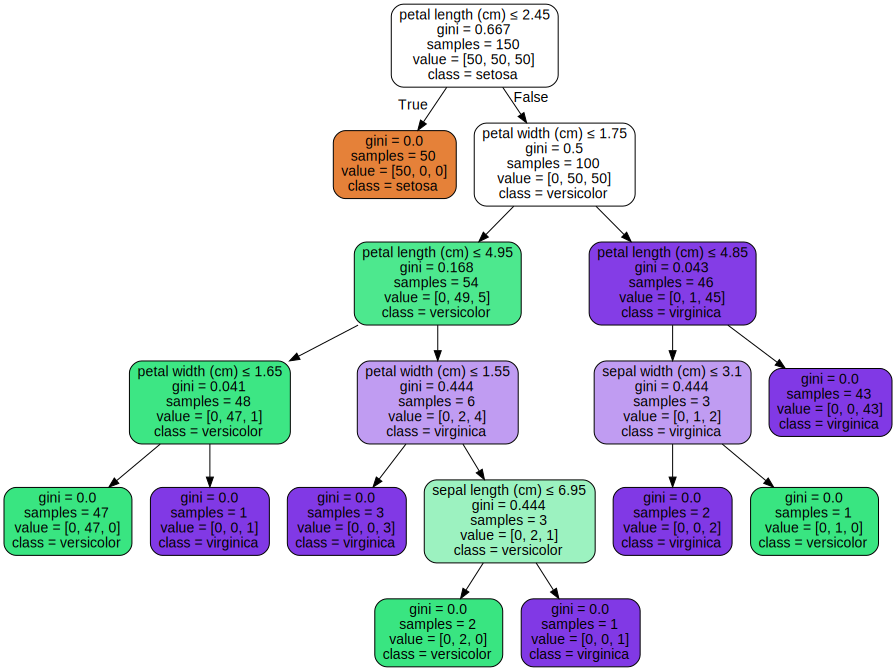

In [30]:
# Visualize decision tree
import graphviz

# tree.plot_tree( classifier.fit( dataset.data, dataset.target ) )
dot_data = tree.export_graphviz( classifier, out_file=None,
                     feature_names=dataset.feature_names,
                     class_names=dataset.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source( dot_data )
graph


# Computer Vision (recognize objects in images)


Load & prepare [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset, which is many "Labelled" image files of hand-written digits.
![MNIST dataset](https://miro.medium.com/max/479/1*yBdJCRwIJGoM7pwU-LNW6Q.png)

In [0]:
import  matplotlib.pyplot  as plt

%tensorflow_version  2.x
import  tensorflow  as  tf
print( tf.__version__ )

from  tensorflow.keras  import Model

%matplotlib inline


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


TensorFlow 2.x selected.
2.1.0-rc1


Build "Model" using Keras, which calls TensorFlow implementation:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


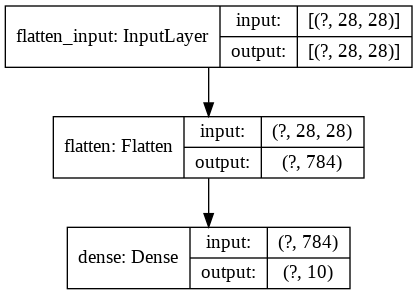

In [0]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten( input_shape=[28, 28] )
    #  , tf.keras.layers.Dense( 128, activation='relu' )
    #  , tf.keras.layers.Dropout( 0.2 )
     , tf.keras.layers.Dense( 10, activation='softmax' )
    ]
)

model.compile(
    optimizer = 'adam'
    , loss = 'sparse_categorical_crossentropy'
    , metrics = [ 'accuracy' ]
)

model.summary()
tf.keras.utils.plot_model( model, 'skip_connection.png', show_shapes=True )

Train & evaluate model:

In [0]:
history = model.fit( x_train, y_train, validation_data=(x_test, y_test), epochs=5 )


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4686 - accuracy: 0.8767 - val_loss: 0.3099 - val_accuracy: 0.9149
Epoch 2/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3041 - accuracy: 0.9150 - val_loss: 0.2816 - val_accuracy: 0.9222
Epoch 3/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2834 - accuracy: 0.9210 - val_loss: 0.2726 - val_accuracy: 0.9236
Epoch 4/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2733 - accuracy: 0.9237 - val_loss: 0.2725 - val_accuracy: 0.9240
Epoch 5/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2667 - accuracy: 0.9260 - val_loss: 0.2668 - val_accuracy: 0.9279


In [0]:
eval_results = model.evaluate( x_test, y_test )
eval_results

10000/10000 [==============================] - 0s 38us/sample - loss: 0.2668 - accuracy: 0.9279


[0.26683657938838007, 0.9279]

Chart the Model's "Learning" progress:

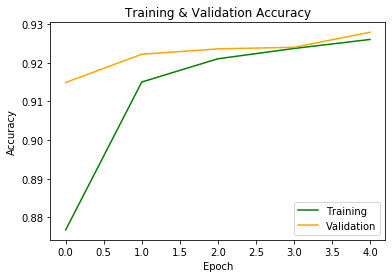

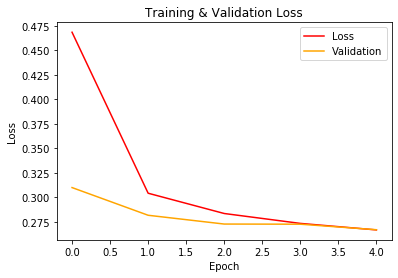

<Figure size 432x288 with 0 Axes>

In [0]:
accuracy     = history.history[     'accuracy' ]
val_accuracy = history.history[ 'val_accuracy' ]
loss     = history.history[     'loss' ]
val_loss = history.history[ 'val_loss' ]
epochs = range( len( accuracy ) )

plt.title( 'Training & Validation Accuracy' )
plt.plot( epochs,     accuracy, color='green',   label='Training' )
plt.plot( epochs, val_accuracy, color='orange', label='Validation' )
plt.xlabel( 'Epoch' )
plt.ylabel( 'Accuracy' )
plt.legend()
_ = plt.figure()

plt.title( 'Training & Validation Loss' )
plt.plot( epochs,     loss, color='red', label='Loss' )
plt.plot( epochs, val_loss, color='orange', label='Validation' )
plt.xlabel( 'Epoch' )
plt.ylabel( 'Loss' )
plt.legend()
_ = plt.figure()


Visualize Learned Network "Weights":

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


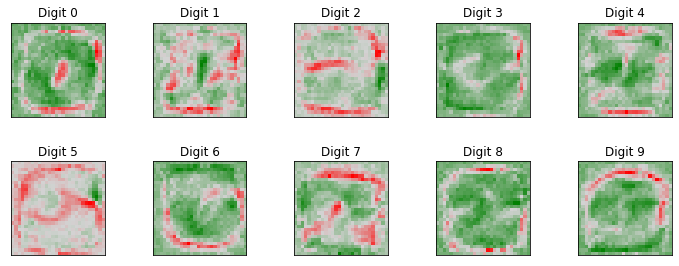

In [0]:
from  matplotlib.colors import LinearSegmentedColormap

model.summary()

def  show_layer_weights(p_digit_number):
  dense_layer = model.layers[1]
  weights_inspect = dense_layer.get_weights()[0]
  dense_layer_weights = []
  for connection in weights_inspect:
    weight = connection[ p_digit_number ]
    dense_layer_weights.append( weight )
  dense_layer_weights
  img = tf.reshape( dense_layer_weights, [28, 28] )
  # plt.imshow( img, cmap = cmap )
  return img

fig, axes = plt.subplots( 2, 5, figsize=(10, 4) )
fig.tight_layout()
axes = axes.reshape(-1)
for digit_number in range( 0, 10 ):
  title = "Digit " + str( digit_number )
  a = axes[ digit_number ]
  img = show_layer_weights( digit_number )
  cmap = LinearSegmentedColormap.from_list( 'rg', ["red", "lightgray", "green"], N=256 )
  a.imshow( img, cmap = cmap )
  a.set_title( title )
  a.set_xticks(()) # ticks be gone
  a.set_yticks(())
plt.show()


# Convolution

Setup...

In [0]:
import scipy
from skimage  import color, data

%matplotlib inline
import matplotlib.pyplot as plt

%tensorflow_version  2.x
import  tensorflow  as  tf
print( tf.__version__ )

from  tensorflow.keras  import Model


Load Data

In [0]:
img = data.astronaut()
img = color.rgb2gray( img )
plt.axis( 'off' )
plt.imshow( img, cmap=plt.cm.gray )
plt.title( 'Eileen Collins, 1st Woman Shuttle Commander' )

Build Model:

In [0]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Conv2D( name = 'Edges_from_Pixels'
        , filters = 4
        , kernel_size = ( 4, 4 )
        , input_shape = ( 10, 10, 3 )
    )
)

model.add(
    tf.keras.layers.Conv2D( name = 'Shapes_from_Edges'
        , filters = 8
        , kernel_size = ( 3, 3 )
    )
)

model.summary()
tf.keras.utils.plot_model( model, 'skip_connection.png', show_shapes=True )
